## QCNN implementation

In [1]:
import matplotlib.pyplot as plt
from torchquantum.plugins import op_history2qasm
from source.models import *
from source.state_prep import *
from source.train_funcs import *

### Calling model and training

In [2]:
circuit_builder = MajoranaCircuit
model = QCNN_Classical(circuit_builder) # QCNN model that we're using
train_load, train_lab, test_load, test_lab = generate_data(model, n_points=500, train_split=0.8)
model, preds = train(model, train_load, train_lab, epochs=10, lr=5e-3)

  0%|          | 0/10 [00:00<?, ?it/s]

epoch: 0, loss: 0.3076403737068176
epoch: 1, loss: 0.30149033665657043
epoch: 2, loss: 0.2982743978500366
epoch: 3, loss: 0.2957763075828552
epoch: 4, loss: 0.2937172055244446
epoch: 5, loss: 0.2921631634235382
epoch: 6, loss: 0.29127201437950134
epoch: 7, loss: 0.2907584309577942
epoch: 8, loss: 0.2904191315174103
epoch: 9, loss: 0.2902638912200928


### Testing the trained model

In [6]:
preds, accuracy = test(model, test_load, test_lab)
print(accuracy)

0.0


### Plot results and visualize phase diagram

Text(0.5, 1.0, 'QCNN classification (1 = trivial, 0 = topological)')

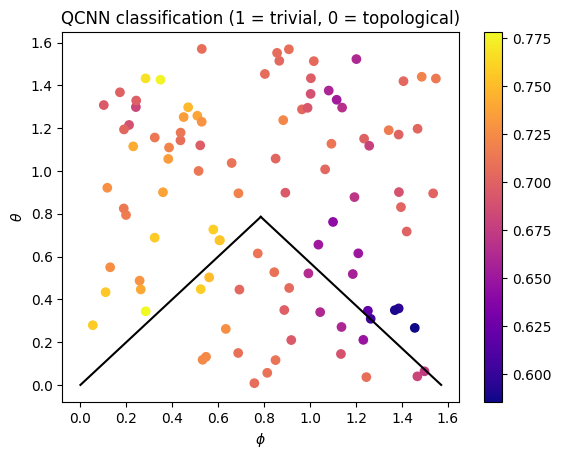

In [4]:
f, ax = plt.subplots()
phis = []
thetas = []
pred_s = []
for i, angles in enumerate(test_load):
    pred = preds[i].detach().numpy()
    theta = angles[0].detach().numpy()
    phi = angles[1].detach().numpy()
    phis.append(phi)
    thetas.append(theta)
    pred_s.append(pred)

points = ax.scatter(phis, thetas, c=pred_s,cmap='plasma')
f.colorbar(points)
ax.plot(np.linspace(0, np.pi/4, 50), np.linspace(0, np.pi/4, 50), c = 'k')
ax.plot(np.linspace(np.pi/4, np.pi/2, 50), np.ones(50)*np.pi/2-np.linspace(np.pi/4, np.pi/2, 50), c = 'k')
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\theta$')
ax.set_title('QCNN classification (1 = trivial, 0 = topological)')

In [5]:
# qiskit_circuit = op_history2qasm(qdev.n_wires, qdev.op_history)